In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## Pooling rho+ and rho- 37°C

In [2]:
rhop_df = pd.read_excel('data/rhop37_22h.xlsx', header=0, index_col=0)
rhom_df = pd.read_excel('data/rhom37_22h.xlsx', header=0, index_col=0)

In [3]:
missing_conditions = [x for x in max(rhop_df.condition.unique().tolist(),rhom_df.condition.unique().tolist(), key=len) if x not in min(rhop_df.condition.unique().tolist(),rhom_df.condition.unique().tolist(), key=len)]
print("Conditions missing in one of the dataframes:", missing_conditions)

Conditions missing in one of the dataframes: ['5-FU']


In [4]:
pool37_df = pd.concat([rhop_df, rhom_df])
pool37_df

,plate_number,RA_well,auc,rearray_plate_nb,condition,mutant_plate,96_well,strain,fluc_assay,pre_culture,fluc_mutant,genotype,FCY1_genotype,FUR1_genotype,respiration,key,Genomix_plate_nb,Genomix_plate_well,rel_fit
0,1,B10,19964.125,1,YPD,5,A3,LL13-040,5.0,3.0,2.0,mutant,NaN,NaN,True,113,1.0,A11,0.926485
1,2,B10,13022.375,1,SD,5,A3,LL13-040,5.0,3.0,2.0,mutant,NaN,NaN,True,113,1.0,A11,0.993439
2,3,B10,18286.875,1,5-FC,5,A3,LL13-040,5.0,3.0,2.0,mutant,NaN,NaN,True,113,1.0,A11,2.226848
3,4,B10,7054.500,1,Mica_low,5,A3,LL13-040,5.0,3.0,2.0,mutant,NaN,NaN,True,113,1.0,A11,0.822359
4,5,B10,4436.375,1,Mica_mid,5,A3,LL13-040,5.0,3.0,2.0,mutant,NaN,NaN,True,113,1.0,A11,0.852268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,29,G9,5166.875,3,Caspo_high,4,A8,NC-02,5.0,3.0,7.0,mutant,NaN,NaN,False,48,NaN,NaN,1.147493
1901,30,G9,9393.625,3,Mica_low,4,A8,NC-02,5.0,3.0,7.0,mutant,NaN,NaN,False,48,NaN,NaN,1.099361
1902,31,G9,5692.625,3,Mica_mid,4,A8,NC-02,5.0,3.0,7.0,mutant,NaN,NaN,False,48,NaN,NaN,0.899664
1903,32,G9,4455.250,3,Mica_high,4,A8,NC-02,5.0,3.0,7.0,mutant,NaN,NaN,False,48,NaN,NaN,0.996951


In [5]:
#sel37_df = pool37_df[pool37_df.condition.isin(['YPD','SD','5-FC','Mica_high','Caspo_high','Nystatin_high','Fluco_high'])]
wide37_df = pool37_df.pivot(index=['rearray_plate_nb','RA_well','strain','fluc_assay','pre_culture','genotype','respiration'],columns='condition', values='rel_fit').reset_index()
wide37_df

condition,rearray_plate_nb,RA_well,strain,fluc_assay,pre_culture,genotype,respiration,5-FC,5-FU,Caspo_high,...,Fluco_low,Fluco_mid,Mica_high,Mica_low,Mica_mid,Nystatin_high,Nystatin_low,Nystatin_mid,SD,YPD
0,1,B10,LL13-040,5.0,3.0,mutant,True,2.226848,NaN,0.841016,...,1.034980,1.017458,0.784494,0.822359,0.852268,1.019612,1.031657,1.069647,0.993439,0.926485
1,1,B11,LL13-040,5.0,4.0,mutant,True,1.891424,NaN,0.881549,...,0.883375,0.862959,0.752825,0.847902,0.897846,0.895025,0.875719,0.999531,0.909714,0.911814
2,1,B12,LL13-040,6.0,3.0,mutant,True,1.847464,NaN,0.875112,...,0.945337,0.979447,0.793232,0.865549,0.923949,0.852591,0.946033,1.048308,0.896583,0.881957
3,1,B13,LL13-040,6.0,5.0,mutant,True,1.935734,NaN,0.837166,...,0.969335,0.955659,0.836984,0.922815,0.970343,0.896804,0.930109,0.974283,0.941059,0.914813
4,1,B14,NC-02,2.0,1.0,mutant,True,2.330562,NaN,0.836619,...,1.204185,1.054352,0.892511,1.111597,1.090386,1.052414,0.940065,1.059577,1.023869,0.941790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,3,G5,NC-02,4.0,2.0,mutant,False,1.885240,1.933137,0.857420,...,0.919113,1.251885,1.065928,0.892301,1.014955,0.864654,0.932186,0.536371,0.881574,0.798866
420,3,G6,NC-02,4.0,1.0,mutant,False,1.713849,2.262752,0.928266,...,0.962157,1.277598,1.095242,1.037172,1.048380,0.964798,1.008687,0.677735,0.936484,0.788152
421,3,G7,NC-02,4.0,1.0,mutant,False,1.542052,1.872157,1.076231,...,1.119070,1.380841,0.963414,1.030458,0.889984,1.025095,0.884778,0.770944,0.841602,0.834562
422,3,G8,NC-02,4.0,4.0,mutant,False,1.907561,2.025109,0.731525,...,0.847610,1.215416,1.177198,0.982474,1.043678,0.968706,0.961764,0.632137,0.889176,0.793636


## Visualize correlation between drug concentrations

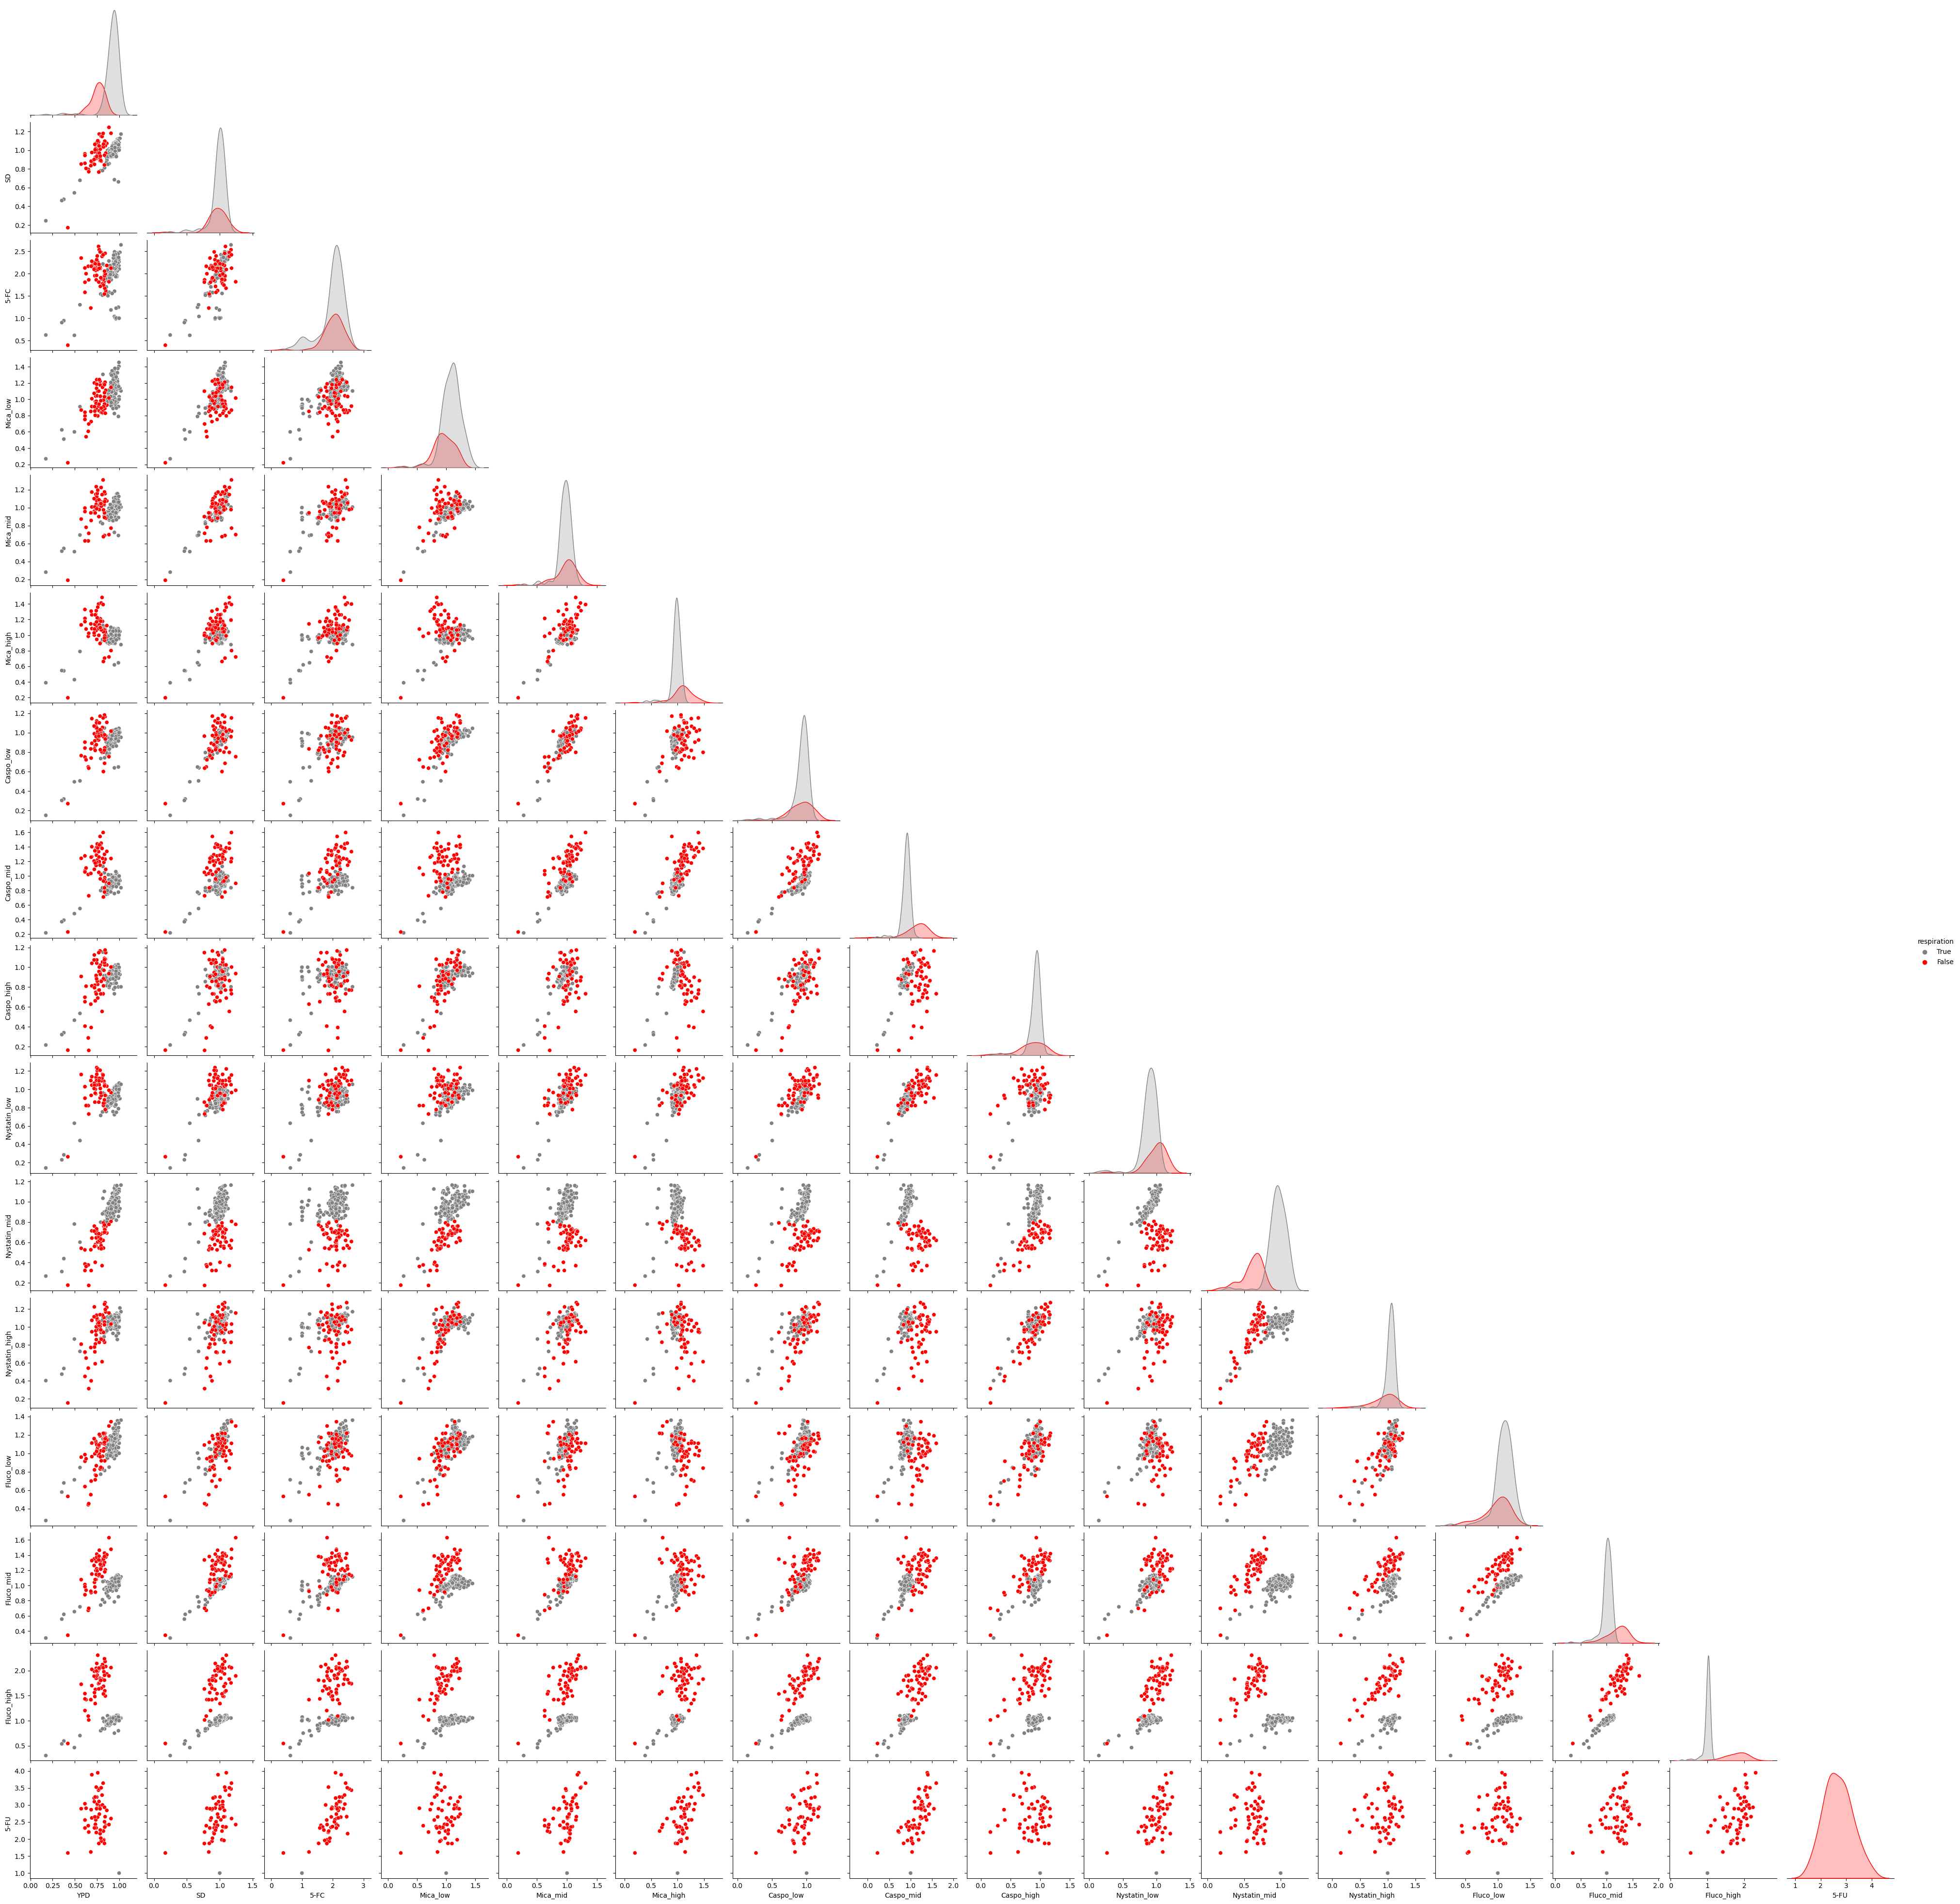

In [7]:
sns.pairplot(wide37_df[wide37_df.strain == 'NC-02'],
             x_vars = [x for x in pool37_df.condition.unique()],
             y_vars = [x for x in pool37_df.condition.unique()],
             hue='respiration', hue_order=[True, False], palette=['grey','red'], 
             corner=True,
            )
plt.savefig('graphs/20230711_NC-02_fit37_pairplot.svg', format='svg', dpi=300)